## Programming Exercise Background

The following expansion gives an approximation to the exact value of π:

$$\pi(N) = \frac{4}{N}\sum_{i=1}^N\frac{1}{1 + \left(\frac{i - \frac{1}{2}}{N}\right)^2}$$

We can check this by hand like so...

$$\pi(1) = 4\frac{4}{5} = 3.2$$, $$\pi(2) = 4\left(\frac{16}{17}+\frac{16}{25}\right) = 3.162$$

It can be shown that the approximation continues to become more accurate as N is increased.

### Exercises

Note that you must use double-precision variables for ALL floating-point numbers.

### Exercise 1

Write a program in C, C++, Fortran or Java that computes an approximation to π using the above formula for the following values of N: 1, 2, 10, 50, 100, 500. For each value of N, print out the approximate value π(N) and the error err(N). The error is the difference between π(N) and the true value of π, ie err(N) = π(N) − π. As N increases the value of the error should decrease.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [114]:
pi_true = np.pi
print(pi_true)

3.141592653589793


In [115]:
def pi_approx(N):
    summation = 0
    for i in range(N):
        alpha  = (i - 0.5)/N       
        summation = summation + 1 / (1 + alpha**2)
        #print("i = {} and summation = {}".format(i, summation))
 
    result = (4 / N)*summation
    #print("pi approximation = {}".format(result))
        
    return result

In [116]:
pi_approx(5)

3.4950161216478772

In [117]:
def pi_error(N):
    
    pi_err = np.abs(pi_true - pi_approx(N))

    #print("The true value of pi = {}, the approxiamtion = {}".format(pi_true, pi_approx(N)))
    #print("Thus, the error is = {}".format(pi_err))
    
    return pi_err

pi_error(5)

0.35342346805808411

In [118]:
N = [1,2,10,50,100,500]
N = [2000, 5000, 10000, 20000]

outputs_list = []
for input in N:
    outputs = pi_approx(input)
    outputs_list.append(pi_error(input))
    print("{} inputs = PI approximation of {}.".format(input, outputs))
    print(pi_error(input))
    

2000 inputs = PI approximation of 3.14259242426687.
0.000999770677077
5000 inputs = PI approximation of 3.141992616913123.
0.00039996332333
10000 inputs = PI approximation of 3.1417926444218836.
0.00019999083209
20000 inputs = PI approximation of 3.141692651297969.
9.99977081757e-05


In [119]:
N
outputs_list

[0.0009997706770770165,
 0.00039996332332981055,
 0.00019999083209043533,
 9.9997708175703082e-05]

/Users/tarek_allam/anaconda/envs/py3/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


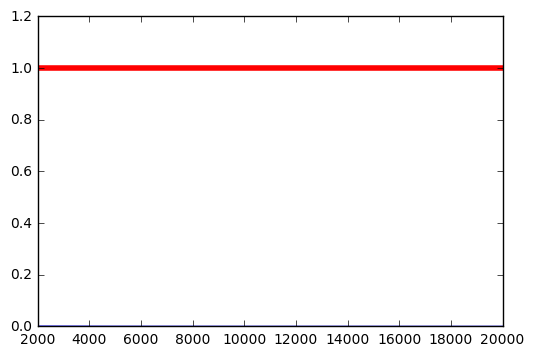

In [120]:
plt.plot(N,outputs_list)
plt.axhline(y=1, linewidth=4, color='r')

In [121]:
0.000001

1e-06

### Exercise 2

We now want to find out the minimum value of N that is required to give a value for π(N) that is accurate to some specified value. We will call this value Nmin. By computing π(N) for increasing values of N, calculate Nmin such that err(Nmin) < 10−6

In [122]:
#N = [1,2,10,50,100,500]
#N = [2000, 5000, 10000, 20000]

# put in timing metrics

#outputs_list = []

for input in range(1999900, 2001000):
                   #1747627
    #outputs = pi_approx(input)
    
    if pi_error(input) < 0.000001:
        print("Got 'eeeem at {}".format(input))
        break
    #else:
        #print("Where they at doh?")
    #outputs_list.append(pi_error(input))
    #print("{} inputs = PI approximation of {}.".format(input, outputs))
    #print(pi_error(input))
    

Got 'eeeem at 2000000


In [123]:
print(pi_approx(2000000))

3.1415936535897444


In [124]:
print(pi_error(2000000))

9.9999995129e-07


### Exercise 3

This way of computing Nmin is clearly inefficient. For example, if we require err(Nmin) < 10−6. and we calculate err(2) = 0.02, it is a waste of time to calculate err(3) as it is already obvious that Nmin is very much larger than 2!   Rewrite your program so that is uses a more efficient way to locate the minimum value of N. Your new method must produce exactly the same value for Nmin as before but should be faster. For example, you might try and reduce the number of times that you have to evaluate err(N). You should also tell us how much faster your new program is.


* scipy.optimize
* Newtons method

Look up other methods

Use recusion

In [150]:
guesses = []

guess = 10

while pi_error(guess) > 0.000001:
    guesses = [guess]
    guess = guess * 2
    guesses.append(guess)
    print(guess)

print(guesses.pop())

#guess = guesses.pop()

20
40
80
160
320
640
1280
2560
5120
10240
20480
40960
81920
163840
327680
655360
1310720
2621440
2621440


In [167]:
upper_lim = guess

In [165]:
lower_lim = guesses.pop()

In [166]:
lower_lim

1310720

In [169]:
import math
middle = math.floor(upper_lim - lower_lim / 2)
print(middle)

1966080


In [181]:
print(middle)

1529600


In [200]:
import math
# first search
guesses = []
guess = 10

while pi_error(guess) > 0.000001:
    guesses = [guess]
    guess = guess * 2
    guesses.append(guess)
    print(guess)

print(guesses.pop())

upper_lim = guess
lower_lim = guesses.pop()
middle = math.floor(upper_lim - lower_lim / 2)

print("Upper - {},\nLower - {},\nMiddle - {}".format(upper_lim, lower_lim, middle))

20
40
80
160
320
640
1280
2560
5120
10240
20480
40960
81920
163840
327680
655360
1310720
2621440
2621440
Upper - 2621440,
Lower - 1310720,
Middle - 1966080


In [223]:
#Is middle point above or below desired answer?
if pi_error(middle) < 0.000001:
    print("Above")
    upper_lim = middle
    # lower, no change
    diff = math.floor((upper_lim - lower_lim) / 2)
    middle = lower_lim + diff
else:
    print("Below")
    #upper_lim stays the same
    lower_lim = middle
    diff = math.floor((upper_lim - lower_lim) / 2)
    middle = lower_lim + diff
print("Upper - {},\nLower - {},\nMiddle - {}".format(upper_lim, lower_lim, middle))

Below
Upper - 2000000,
Lower - 1999999,
Middle - 1999999


In [162]:
import math

def search_interval(guess):
    if pi_error(guess) < 0.000001:
        mid = math.floor((guess - (guess/2))/2)
        guess = math.floor(guess - mid)
        #guesses.append(guess)
        print("DIFF = {}".format(guess - mid))
        #    return
        print("I'm here fam 1")
        find_min(guess)
    elif pi_error(guess) > 0.000001:
        mid = math.floor((guess + (guess/2))/2)
        guess = math.floor((guess + (guess/2)))
        print("I'm here fam 2")
        #guesses.append(guess)
        print("DIFF = {}".format(guess - mid))
        #guess = guess + mid
        find_min(guess)
    else:
        print("Finally it's happened to me, right in front of my face and I just can not hide it. FIIINALLY YHH")
        
    

#guess = 10
def find_min(guess, upper_lim=100000000):
    
    print("Guessing {}".format(guess))
    if pi_error(guess) < 0.000001:
            print("Got 'eeeem at {}".format(guess))
            # The true min will be equal to or at least less that the above discovered result
            # Therefore, we shall look in the interval using the above result as an upper limit
            print("Now looking for true min in closet interval range...")
            # maybe better to search backward
            #upper_lim = guess
            search_interval(guess)
    else:
    #    if guess * 2 > upper_lim:
    #        print("I'm here fam 3")
            search_interval(guess)
    #    else:
    #        guess = guess * 2
    #        print("I'm here fam 4")
    #        find_min(guess)
        
#find_min(guess)
search_interval(guess)

DIFF = 1310720
I'm here fam 1
Guessing 1966080
I'm here fam 2
DIFF = 1474560
Guessing 2949120
Got 'eeeem at 2949120
Now looking for true min in closet interval range...
DIFF = 1474560
I'm here fam 1
Guessing 2211840
Got 'eeeem at 2211840
Now looking for true min in closet interval range...
DIFF = 1105920
I'm here fam 1
Guessing 1658880
I'm here fam 2
DIFF = 1244160
Guessing 2488320
Got 'eeeem at 2488320
Now looking for true min in closet interval range...
DIFF = 1244160
I'm here fam 1
Guessing 1866240
I'm here fam 2
DIFF = 1399680
Guessing 2799360
Got 'eeeem at 2799360
Now looking for true min in closet interval range...
DIFF = 1399680
I'm here fam 1
Guessing 2099520
Got 'eeeem at 2099520
Now looking for true min in closet interval range...
DIFF = 1049760
I'm here fam 1
Guessing 1574640
I'm here fam 2
DIFF = 1180980
Guessing 2361960
Got 'eeeem at 2361960
Now looking for true min in closet interval range...
DIFF = 1180980
I'm here fam 1
Guessing 1771470
I'm here fam 2
DIFF = 1328603
Gue

KeyboardInterrupt: 

In [90]:
import math

#def find_min_interval(guess, lower_lim, upper_lim):
    
    # find mid-range of interval
#    mid = math.floor((upper_lim - lower_lim) / 2)    
#    new_guess = upper_lim - mid
    
#    tol = upper_lim - new_guess
#    if tol < 5000:
#        print("Answer = {}, with tolerance of less than 5000".format(new_guess))
#        return new_guess
    
#    find_min(new_guess, upper_lim)
    
def search_interval(guess):
                
    upper_lim = guess
    lower_lim = math.floor(upper_lim / 2)
    mid = math.floor((upper_lim - lower_lim) / 2)    
    new_guess = upper_lim - mid
    if (upper_lim - new_guess) < 5:
        print("Got 'eeeem at {}".format(new_guess))
        return

    print("New guess 1 = {}".format(new_guess))
    print("New upperlim 1 = {}".format(upper_lim))
            
    return new_guess, upper_lim

guess = 10

def find_min(guess, upper_lim=100000000):
    
    #while pi_error(guess) < 0.000001:
    #    guess * 2
        
    
    print("Guessing {}".format(guess))
    if pi_error(guess) < 0.000001:
            print("Got 'eeeem at {}".format(guess))
            # The true min will be equal to or at least less that the above discovered result
            # Therefore, we shall look in the interval using the above result as an upper limit
            print("Now looking for true min in closet interval range...")
            # maybe better to search backward
            
            new_guess, new_upper_lim = search_interval(guess)
            
         find_min(new_guess, new_upper_lim)
           
            #lower_lim = math.floor(guess / 2)
            #mid = math.floor((new_upper_lim - lower_lim) / 2)    
            #new_guess = new_upper_lim - mid
            
            #lower_lim = math.floor(upper_lim / 2)
            #mid = math.floor((upper_lim - lower_lim) / 2)    
            #new_guess = upper_lim - mid
            #print("New guess 1 = {}".format(new_guess))
            #print("New upperlim 1 = {}".format(upper_lim))
            
            #find_min_interval(guess, lower_lim, new_upper_lim)
            # new guess is the middle
            
            #new_guess = lower_lim + math.floor((new_upper_lim / 4))
            #print("trying new guess of {}".format(new_guess))
            
            #tol = upper_lim - new_guess
            #if tol < 5000:
            #    print("Answer = {}, with tolerance of less than 5000".format(new_guess))
            #    return new_guess
            
            #tol = new_upper_lim - new_guess
            #if tol < 50000:
            #    return new_guess
            #find_min(new_guess, upper_lim)
    else:
        if guess*2 > upper_lim:
            print("It's toooo high!!")
            
            new_guess, new_upper_lim = search_interval(guess)
            
            find_min(new_guess, new_upper_lim)
            #search_interval()
            
            #new_upper_lim = guess
            #lower_lim = math.floor(upper_lim / 2)
            #mid = math.floor((upper_lim - lower_lim) / 2)    
            #new_guess = upper_lim - mid
            #print("New guess 2 = {}".format(new_guess))
            #print("New upperlim 2 = {}".format(upper_lim))
            
            #find_min(new_guess, upper_lim)
            
            #new_upper_lim = guess
            #lower_lim = math.floor(guess / 2)
            #find_min_interval(guess, lower_lim, new_upper_lim)
           
            #lower_lim = math.floor(guess / 2)
            #addition = math.floor((upper_lim - lower_lim)/2)
            #guess = guess + addition
            #find_min(guess, upper_lim)
            #return "Fammm"
        else:    
            #guess = guess * 2
            find_min(guess)
        
find_min(guess)


    

Guessing 10
Guessing 20
Guessing 40
Guessing 80
Guessing 160
Guessing 320
Guessing 640
Guessing 1280
Guessing 2560
Guessing 5120
Guessing 10240
Guessing 20480
Guessing 40960
Guessing 81920
Guessing 163840
Guessing 327680
Guessing 655360
Guessing 1310720
Guessing 2621440
Got 'eeeem at 2621440
Now looking for true min in closet interval range...
New guess 1 = 1966080
New upperlim 1 = 2621440
Guessing 1966080
It's toooo high!!
New guess 1 = 1474560
New upperlim 1 = 1966080
Guessing 1474560
It's toooo high!!
New guess 1 = 1105920
New upperlim 1 = 1474560
Guessing 1105920
It's toooo high!!
New guess 1 = 829440
New upperlim 1 = 1105920
Guessing 829440
It's toooo high!!
New guess 1 = 622080
New upperlim 1 = 829440
Guessing 622080
It's toooo high!!
New guess 1 = 466560
New upperlim 1 = 622080
Guessing 466560
It's toooo high!!
New guess 1 = 349920
New upperlim 1 = 466560
Guessing 349920
It's toooo high!!
New guess 1 = 262440
New upperlim 1 = 349920
Guessing 262440
It's toooo high!!
New guess 1 

TypeError: 'NoneType' object is not iterable

In [110]:
1310720 + math.floor((1310720/2))

1966080

In [112]:
import math

def search_interval(guess):
    if pi_error(guess) < 0.000001:
        mid = guess - math.floor((guess/2))
        guess = guess - mid
        find_min(guess)
    elif pi_error(guess) > 0.000001:
        guess = guess + math.floor((guess/2))
        print("I'm here fam")
        #guess = guess + mid
        find_min(guess)

guess = 10
def find_min(guess, upper_lim=100000000):
    
    print("Guessing {}".format(guess))
    if pi_error(guess) < 0.000001:
            print("Got 'eeeem at {}".format(guess))
            # The true min will be equal to or at least less that the above discovered result
            # Therefore, we shall look in the interval using the above result as an upper limit
            print("Now looking for true min in closet interval range...")
            # maybe better to search backward
            #upper_lim = guess
            search_interval(guess)
    else:
        if guess * 2 > upper_lim:
            #print("I'm here fam")
            search_interval(guess)
        else:
            guess = guess * 2
            find_min(guess)
        
find_min(guess)

Guessing 10
Guessing 20
Guessing 40
Guessing 80
Guessing 160
Guessing 320
Guessing 640
Guessing 1280
Guessing 2560
Guessing 5120
Guessing 10240
Guessing 20480
Guessing 40960
Guessing 81920
Guessing 163840
Guessing 327680
Guessing 655360
Guessing 1310720
Guessing 2621440
Got 'eeeem at 2621440
Now looking for true min in closet interval range...
Guessing 1310720
Guessing 2621440
Got 'eeeem at 2621440
Now looking for true min in closet interval range...
Guessing 1310720
Guessing 2621440
Got 'eeeem at 2621440
Now looking for true min in closet interval range...
Guessing 1310720
Guessing 2621440
Got 'eeeem at 2621440
Now looking for true min in closet interval range...


KeyboardInterrupt: 

In [96]:
guess

10

In [51]:
1474560 - 1105920

368640

In [47]:
upper_lim = 1474560

In [48]:
lower_lim = math.floor(1474560 / 2)

In [49]:
new_guess = lower_lim + math.floor((upper_lim / 4))

In [50]:
print(new_guess)

1105920


In [1]:
import math
import numpy as np

pi_true = np.pi
print(pi_true)

def pi_error(N):

    pi_err = np.abs(pi_true - pi_approx(N))

    #print("The true value of pi = {}, the approxiamtion = {}".format(pi_true, pi_approx(N)))
    #print("Thus, the error is = {}".format(pi_err))

    return pi_err

def pi_approx(N):
    summation = 0
    for i in range(N):
        alpha  = (i - 0.5)/N
        summation = summation + 1 / (1 + alpha**2)
        #print("i = {} and summation = {}".format(i, summation))

    result = (4 / N)*summation
    #print("pi approximation = {}".format(result))

    return result

# first search
guesses = []
guess = 10

while pi_error(guess) > 0.000001:
    guesses = [guess]
    guess = guess * 2
    guesses.append(guess)
    print(guess)

print(guesses.pop())

upper_lim = guess
lower_lim = guesses.pop()
middle = math.floor(upper_lim - lower_lim / 2)

print("Upper - {},\nLower - {},\nMiddle - {}".format(upper_lim, lower_lim, middle))

while True:
    #Is middle point above or below desired answer?
    if pi_error(middle) < 0.000001:
        print("Above")
        upper_lim = middle
        # lower, no change
        diff = math.floor((upper_lim - lower_lim) / 2)
        middle = lower_lim + diff
    else:
        print("Below")
        #upper_lim stays the same
        lower_lim = middle
        diff = math.floor((upper_lim - lower_lim) / 2)
        middle = lower_lim + diff
    print("Upper - {},\nLower - {},\nMiddle - {}".format(upper_lim, lower_lim, middle))
    if (middle == lower_lim) or (middle == upper_lim):
        for input in range(lower_lim, upper_lim + 1):

            if pi_error(input) < 0.000001:
                print("Got 'eeeem at {}".format(input))
                break
        break
        # return middle

3.141592653589793
20
40
80
160
320
640
1280
2560
5120
10240
20480
40960
81920
163840
327680
655360
1310720
2621440
2621440
Upper - 2621440,
Lower - 1310720,
Middle - 1966080
Below
Upper - 2621440,
Lower - 1966080,
Middle - 2293760
Above
Upper - 2293760,
Lower - 1966080,
Middle - 2129920
Above
Upper - 2129920,
Lower - 1966080,
Middle - 2048000
Above
Upper - 2048000,
Lower - 1966080,
Middle - 2007040
Above
Upper - 2007040,
Lower - 1966080,
Middle - 1986560
Below
Upper - 2007040,
Lower - 1986560,
Middle - 1996800
Below
Upper - 2007040,
Lower - 1996800,
Middle - 2001920
Above
Upper - 2001920,
Lower - 1996800,
Middle - 1999360
Below
Upper - 2001920,
Lower - 1999360,
Middle - 2000640
Above
Upper - 2000640,
Lower - 1999360,
Middle - 2000000
Above
Upper - 2000000,
Lower - 1999360,
Middle - 1999680
Below
Upper - 2000000,
Lower - 1999680,
Middle - 1999840
Below
Upper - 2000000,
Lower - 1999840,
Middle - 1999920
Below
Upper - 2000000,
Lower - 1999920,
Middle - 1999960
Below
Upper - 2000000,
Lower